Problem: 모든 데이터를 훈련시키고 그 데이터로 평가하면 정답을 맞출 수 밖에 없어서 제대로 모델을 평가할 수 없음.

# 지도 학습과 비지도 학습

**지도 학습(supervised learning)**
- 정답이 있는 훈련 데이터를 이용하여 정답을 맞히는 알고리즘을 학습시키는 방식
- 지도 학습을 사용하는 문제: 분류, 회귀

**비지도 학습(unsupervised learning)**
- 정답 없이 입력 데이터만으로 학습시켜 패턴과 상관관계를 찾아내는 기술. 데이터를 파악하거나 변형하는 데에 이용
- 비지도 학습을 사용하는 문제: 클러스터링, 차원 축소

## 훈련 세트와 테스트 세트

생선 데이터를 훈련 세트와 테스트 세트로 나누고 학습 및 평가 진행

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

for과 zip 함수를 이용하여 데이터 합치기

In [2]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [3]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

리스트를 슬라이싱하여 train과 test 세트로 나눠준다.

In [4]:
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

In [5]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

## 샘플링 편향

train set에는 도미 데이터만 들어가고, test set에는 빙어 데이터만 들어갔다.

그래서 test set으로 모델을 평가하게 되면, 전부 도미라고 예측하기 때문에 정확도가 0이라고 나오게 된다.

이와 같이 train set와 test set에 샘플이 골고루 섞이지 않은 경우, 샘플링이 한쪽으로 치우쳤다는 의미로 **샘플링 편향**이라고 부른다.


## 넘파이

**넘파이**는 파이썬의 대표적인 배열 라이브러리로, 고차원의 배열을 다룰 때 용이하다.

In [6]:
import numpy as np

list였던 생선 데이터들을 numpy array로 바꿔준다.

In [7]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [8]:
print(type(fish_data))
print(type(input_arr))

<class 'list'>
<class 'numpy.ndarray'>


In [9]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [10]:
print(input_arr.shape)

(49, 2)


np.random.shuffle을 이용하여 인덱스를 섞고 해당 인덱스를 이용하여 train set과 test set을 나눈다.

In [11]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

In [12]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [13]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [14]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

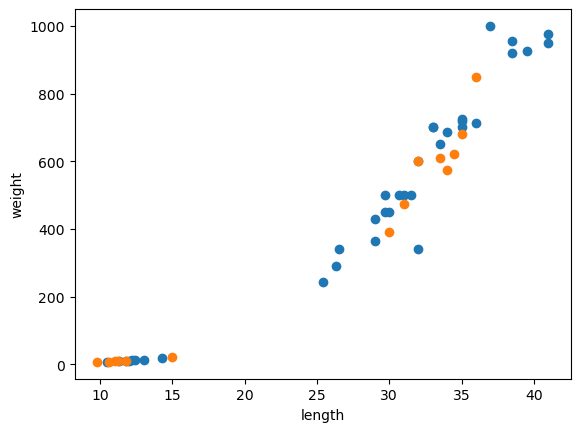

In [15]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

train과 test에서 샘플링이 잘 된 것을 확인할 수 있다. 다만 이렇게 랜덤으로 섞었음에도 샘플링 편향이 발생할 수 있는데, 이러한 경우엔 train과 test에 각 라벨별로 골고루 나눠지도록 신경써야 한다.

## 두 번째 머신러닝 프로그램

위와 같이 나눈 train과 test로 훈련을 시키고 평가를 진행한다.

In [16]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [17]:
kn.score(test_input, test_target)

1.0

In [18]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [19]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])